# Human Development Index

In [3]:
%matplotlib notebook

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [84]:
hdiDataframeOriginal = pd.read_csv("./Datasets/Sub-national-HDI-data.csv")
hdiDataframeOriginal.head()

,Country,ISO_Code,Level,GDLCODE,Region,1990,1991,1992,1993,1994,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Mexico,MEX,National,MEXt,Total,0.649,0.654,0.659,0.663,0.669,...,0.741,0.742,0.743,0.751,0.757,0.757,0.761,0.767,0.772,0.774
1,Mexico,MEX,Subnat,MEXr101,Aguascalientes,0.663,0.668,0.674,0.678,0.683,...,0.764,0.766,0.767,0.774,0.780,0.778,0.781,0.787,0.792,0.794
2,Mexico,MEX,Subnat,MEXr102,Baja California,0.678,0.684,0.690,0.695,0.700,...,0.775,0.775,0.777,0.784,0.790,0.789,0.791,0.796,0.801,0.803
3,Mexico,MEX,Subnat,MEXr103,Baja California Sur,0.677,0.683,0.688,0.693,0.698,...,0.767,0.766,0.767,0.778,0.787,0.789,0.795,0.803,0.809,0.811
4,Mexico,MEX,Subnat,MEXr104,Campeche,0.654,0.659,0.665,0.668,0.673,...,0.741,0.742,0.741,0.748,0.751,0.750,0.750,0.756,0.761,0.762


In [85]:
hdiDataframe = hdiDataframeOriginal.loc[hdiDataframeOriginal["Level"]=="Subnat",["Region", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]

In [86]:
hdiDataframe.head()

,Region,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Aguascalientes,0.766,0.767,0.774,0.780,0.778,0.781,0.787,0.792,0.794
2,Baja California,0.775,0.777,0.784,0.790,0.789,0.791,0.796,0.801,0.803
3,Baja California Sur,0.766,0.767,0.778,0.787,0.789,0.795,0.803,0.809,0.811
4,Campeche,0.742,0.741,0.748,0.751,0.750,0.750,0.756,0.761,0.762
5,Chiapas,0.654,0.654,0.664,0.673,0.678,0.684,0.693,0.698,0.700


In [87]:
hdiDataframe.dtypes

Region     object
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
dtype: object

In [26]:
# hdiDataframe["% last year growth"] = (hdiDataframe["2017"] - hdiDataframe["2016"]) * 100 / hdiDataframe["2016"]
(hdiDataframe["2017"] - hdiDataframe["2016"]) * 100 / hdiDataframe["2016"]

In [88]:
hdiDataframe.head()

,Region,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Aguascalientes,0.766,0.767,0.774,0.780,0.778,0.781,0.787,0.792,0.794
2,Baja California,0.775,0.777,0.784,0.790,0.789,0.791,0.796,0.801,0.803
3,Baja California Sur,0.766,0.767,0.778,0.787,0.789,0.795,0.803,0.809,0.811
4,Campeche,0.742,0.741,0.748,0.751,0.750,0.750,0.756,0.761,0.762
5,Chiapas,0.654,0.654,0.664,0.673,0.678,0.684,0.693,0.698,0.700


In [89]:
topStates = hdiDataframe.nlargest(8, "2017")["Region"]

In [90]:
topStates.tolist()

['Distrito Federal',
 'Baja California Sur',
 'Nuevo Leon',
 'Sonora',
 'Sinaloa',
 'Baja California',
 'Coahuila',
 'Aguascalientes']

In [54]:
hdiDataframe.loc[hdiDataframe["Region"].isin(topStates.tolist()),:]

,Region,2009,2010,2011,2012,2013,2014,2015,2016,2017,% last year growth
1,Aguascalientes,0.766,0.767,0.774,0.780,0.778,0.781,0.787,0.792,0.794,0.252525
2,Baja California,0.775,0.777,0.784,0.790,0.789,0.791,0.796,0.801,0.803,0.249688
3,Baja California Sur,0.766,0.767,0.778,0.787,0.789,0.795,0.803,0.809,0.811,0.247219
7,Coahuila,0.767,0.768,0.776,0.782,0.782,0.787,0.792,0.797,0.799,0.250941
9,Distrito Federal,0.809,0.809,0.816,0.819,0.817,0.818,0.823,0.828,0.830,0.241546
19,Nuevo Leon,0.784,0.785,0.792,0.796,0.794,0.796,0.801,0.806,0.808,0.248139
25,Sinaloa,0.768,0.771,0.779,0.786,0.786,0.791,0.796,0.803,0.804,0.124533
26,Sonora,0.780,0.782,0.790,0.794,0.792,0.794,0.799,0.804,0.806,0.248756


In [91]:
hdiDataframe.set_index("Region").T.head()

Region,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Distrito Federal,Durango,...,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
2009,0.766,0.775,0.766,0.742,0.654,0.764,0.767,0.761,0.809,0.739,...,0.756,0.726,0.768,0.780,0.745,0.771,0.735,0.707,0.737,0.731
2010,0.767,0.777,0.767,0.741,0.654,0.768,0.768,0.764,0.809,0.740,...,0.758,0.728,0.771,0.782,0.748,0.771,0.735,0.707,0.738,0.735
2011,0.774,0.784,0.778,0.748,0.664,0.774,0.776,0.770,0.816,0.749,...,0.764,0.735,0.779,0.790,0.753,0.778,0.745,0.716,0.746,0.742
2012,0.780,0.790,0.787,0.751,0.673,0.779,0.782,0.773,0.819,0.756,...,0.769,0.741,0.786,0.794,0.759,0.782,0.752,0.722,0.752,0.746
2013,0.778,0.789,0.789,0.750,0.678,0.778,0.782,0.770,0.817,0.756,...,0.767,0.740,0.786,0.792,0.757,0.779,0.751,0.725,0.755,0.745


In [92]:
x = hdiDataframe.set_index("Region").T.reset_index()
x.head()

Region,index,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Distrito Federal,...,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
0,2009,0.766,0.775,0.766,0.742,0.654,0.764,0.767,0.761,0.809,...,0.756,0.726,0.768,0.780,0.745,0.771,0.735,0.707,0.737,0.731
1,2010,0.767,0.777,0.767,0.741,0.654,0.768,0.768,0.764,0.809,...,0.758,0.728,0.771,0.782,0.748,0.771,0.735,0.707,0.738,0.735
2,2011,0.774,0.784,0.778,0.748,0.664,0.774,0.776,0.770,0.816,...,0.764,0.735,0.779,0.790,0.753,0.778,0.745,0.716,0.746,0.742
3,2012,0.780,0.790,0.787,0.751,0.673,0.779,0.782,0.773,0.819,...,0.769,0.741,0.786,0.794,0.759,0.782,0.752,0.722,0.752,0.746
4,2013,0.778,0.789,0.789,0.750,0.678,0.778,0.782,0.770,0.817,...,0.767,0.740,0.786,0.792,0.757,0.779,0.751,0.725,0.755,0.745


<IPython.core.display.Javascript object>


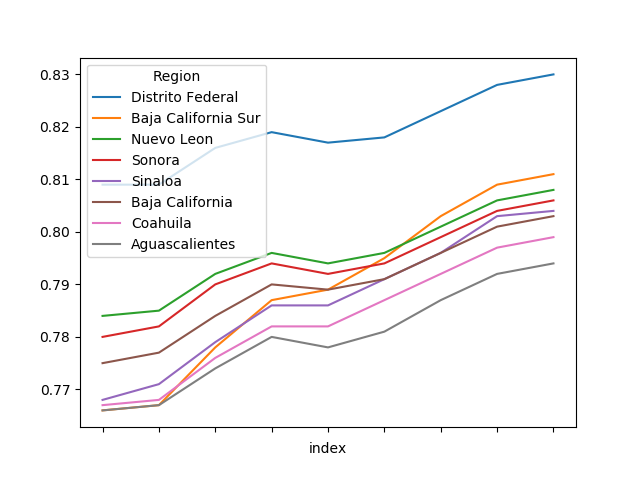

In [93]:
x.plot(x="index", y=topStates.tolist())

In [117]:
# hdiDataframe["Region"]
percentGrowthHDI = hdiDataframe
percentGrowthHDI["last year growth"] = (hdiDataframe["2017"] - hdiDataframe["2016"]) * 100 / hdiDataframe["2016"]
percentGrowthHDI = percentGrowthHDI.loc[:,["Region", "2017", "last year growth"]]

percentGrowthHDI.to_csv("./Datasets/percentGrowthHDI.csv")
percentGrowthHDI.head()

,Region,2017,last year growth
1,Aguascalientes,0.794,0.252525
2,Baja California,0.803,0.249688
3,Baja California Sur,0.811,0.247219
4,Campeche,0.762,0.131406
5,Chiapas,0.700,0.286533


<IPython.core.display.Javascript object>


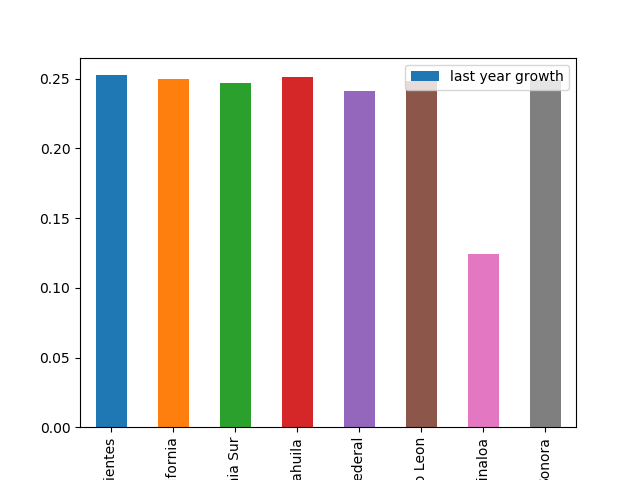

In [118]:
percentGrowthHDI.loc[percentGrowthHDI["Region"].isin(topStates.tolist())].plot(kind="bar", x="Region", y="last year growth", sort_columns=True)